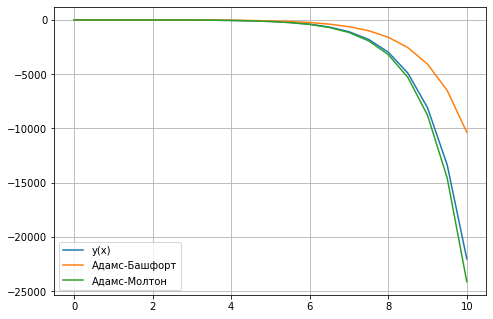

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import *

x, y = symbols('x y')

def ode_adams_bashforth(f, xs, x0, y0, n, h):
    ys = [y0, y0 + h * f(x0, y0)]
    for i in range(2, n + 1):
        ys.append( ys[i - 1] + h * (3 * f(xs[i - 1], ys[i - 1]) - f(xs[i - 2], ys[i - 2])) / 2 )
    return ys

def ode_adams_moulton(f, xs, x0, y0, n, h):
    ys = [y0]
    for i in range(1, n + 1):
        fi = f(xs[i - 1], ys[i - 1])
        yi = ys[i - 1] + h * (fi + f(xs[i], ys[i - 1] + h * fi)) / 2
        ys.append( ys[i - 1] + h * ( f(xs[i], yi) + fi) / 2 )
    return ys


a, b = 0, 10
n = 20
h = (b - a) / n
xs = [a + i * h for i in range(n + 1)]
x0 = a
y0 = 0

f = lambda x_, y_ : (y - x).subs({x: x_, y: y_})
res = x + 1 - exp(x)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(xs, list(map(lambda xi: res.subs(x, xi), xs)), label='y(x)')
ax.plot(xs, ode_adams_bashforth(f, xs, x0, y0, n, h), label='Адамс-Башфорт')
ax.plot(xs, ode_adams_moulton(f, xs, x0, y0, n, h), label='Адамс-Молтон')
ax.legend()
plt.grid()
plt.show()